In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension de X :  (1000, 2)
dimension de y :  (1000, 1)


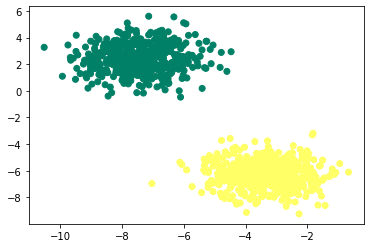

In [2]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2)
y = y.reshape((y.shape[0], 1 ))

print('dimension de X : ', X.shape)
print('dimension de y : ', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return(W, b)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [5]:
def log_loss(A, y):
    return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return dW, db

In [7]:
def predict(X, W, b):
    A = model(X, W, b)
    return A>= 0.5

In [8]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

In [9]:
def neuron(X, y, learning_rate = 0.001 , iter = 1000):
    W, b = initialisation(X)
    
    loss = []
    
    for i in range(iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    predictions = predict(X, W, b)
    print(accuracy_score(y, predictions))
        
    plt.plot(loss)
    plt.show()
    
    return(W, b)

1.0


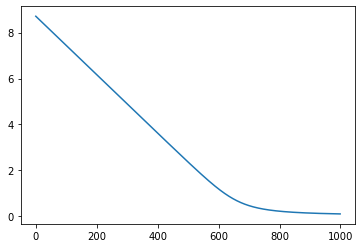

In [10]:
W, b = neuron(X, y)